In [44]:
import pandas as pd
import seaborn as sns
import rdkit.Chem as Chem
from rdkit.Chem.rdMolDescriptors import CalcFractionCSP3
import matplotlib.pyplot as plt

In [45]:
path_train = 'data/big_dataset_train_props.parquet'
path_pred = 'results/SVC_tola_150_15-40-59/preds_20230927-142450/predictions.csv'

In [46]:
df0 = pd.read_parquet(path_train)
df0['data'] = 'train'
df1 = pd.read_csv(path_pred)
df1['data'] = 'predicted'
df1['mol'] = df1['smiles'].apply(Chem.MolFromSmiles)
df1['fraction_sp3'] = df1['mol'].apply(CalcFractionCSP3)

df = pd.concat([df0, df1])
df.head()

,smiles,logP,tpsa,fraction_sp3,qed,mol_wt,num_HBA,num_HBD,data,idx,largest_ring,num_rings,no_unwanted_frags,num_rotatable_bonds,bridgehead_atoms,spiro_atoms,mol
1,Cc1nc2c(c(C)c1CC(=O)NCc1ccco1)c(=O)[nH]n2C,1.33034,92.92,0.312500,0.759565,314.137890,5,2,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O=C(c1csnn1)N1CCCC2(CCN(c3ncccn3)C2)C1,1.46080,75.11,0.533333,0.829743,330.126280,7,0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CCC(C(=O)NCc1ccco1)n1nc(C)c2c(C)n(-c3ccc(C)cc3...,3.36796,94.95,0.304348,0.517035,419.195740,7,1,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,O=S(=O)(NCc1ccc2c(c1)OCO2)c1c[nH]cn1,0.61690,93.31,0.181818,0.856432,281.047027,5,2,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,O=C(c1cc(O)nc2ccccc12)N1CCN(c2cccc(C(F)(F)F)c2...,3.92160,56.67,0.238095,0.707290,401.135111,4,1,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
fp_type = 'ECFP'
#fp_type = 'klek'

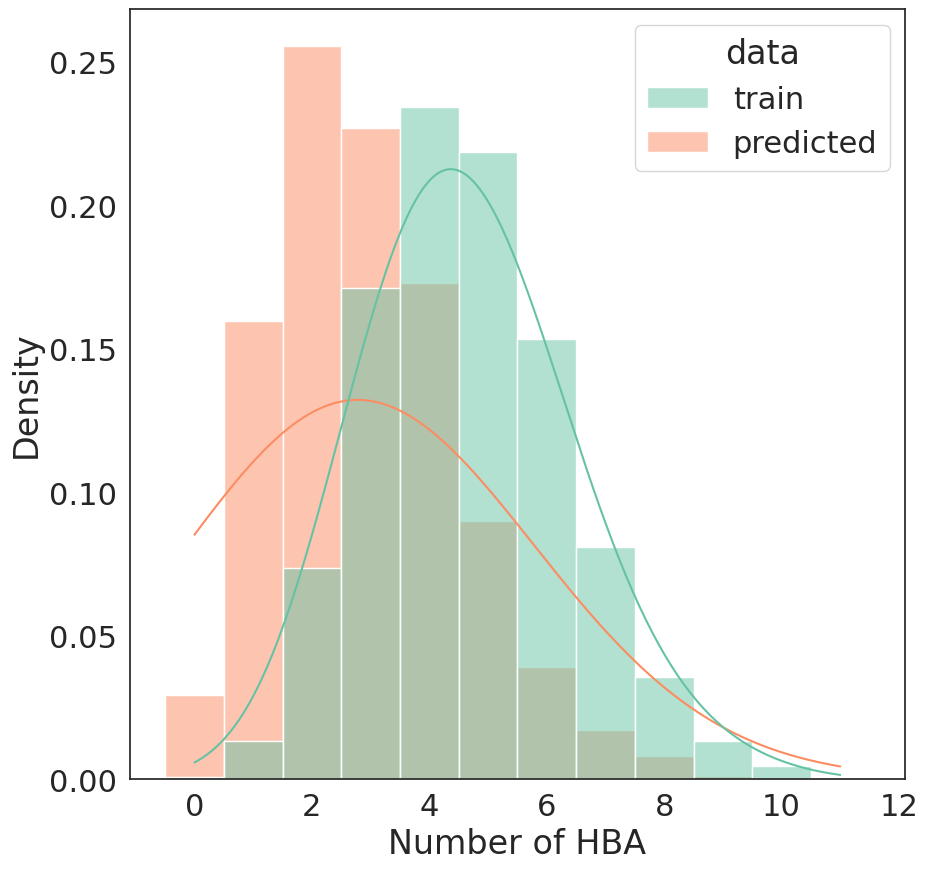

In [48]:
#df['num_HBA'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBA)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})

fig = sns.histplot(df, x='num_HBA', binwidth=1, stat='density', palette='Set2', 
             kde=True, kde_kws={'bw_adjust': 8}, hue='data', common_norm=False, discrete=True)
fig.set(xlabel='Number of HBA')
plt.savefig(f"plots/train_vs_{fp_type}_HBA.svg", format='svg')

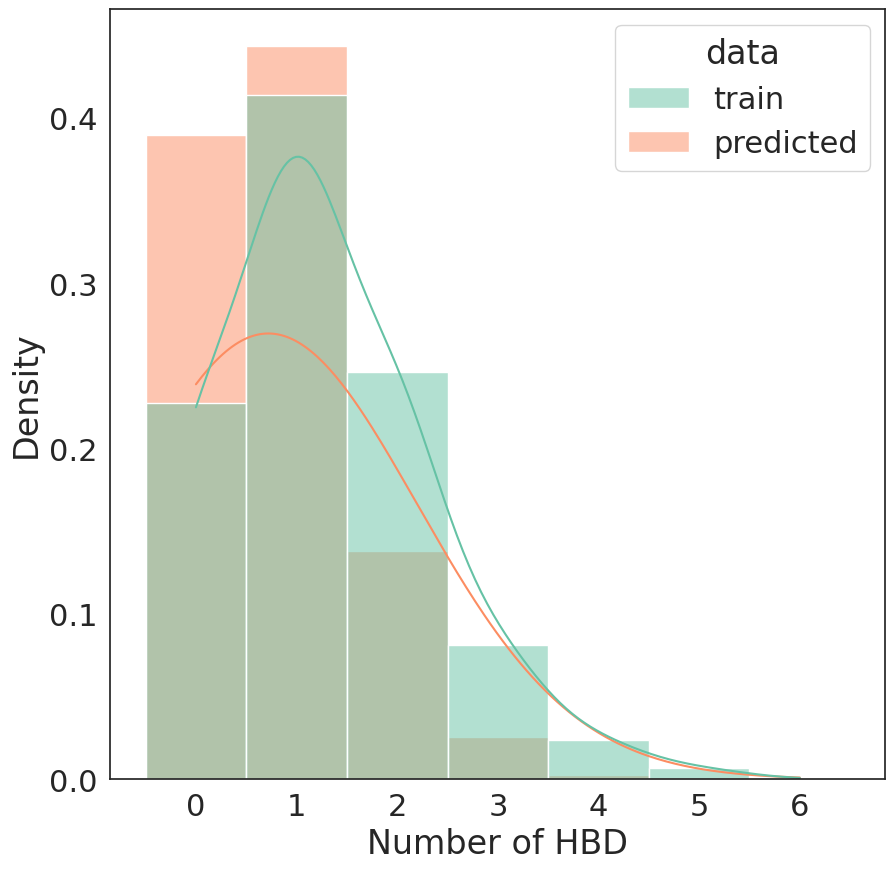

In [49]:
#df['num_HBD'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBD)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(df, x='num_HBD', binwidth=1, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 8}, hue='data', common_norm=False, discrete=True)
fig.set(xlabel='Number of HBD')
plt.savefig(f"plots/train_vs_{fp_type}_HBD.svg", format='svg')

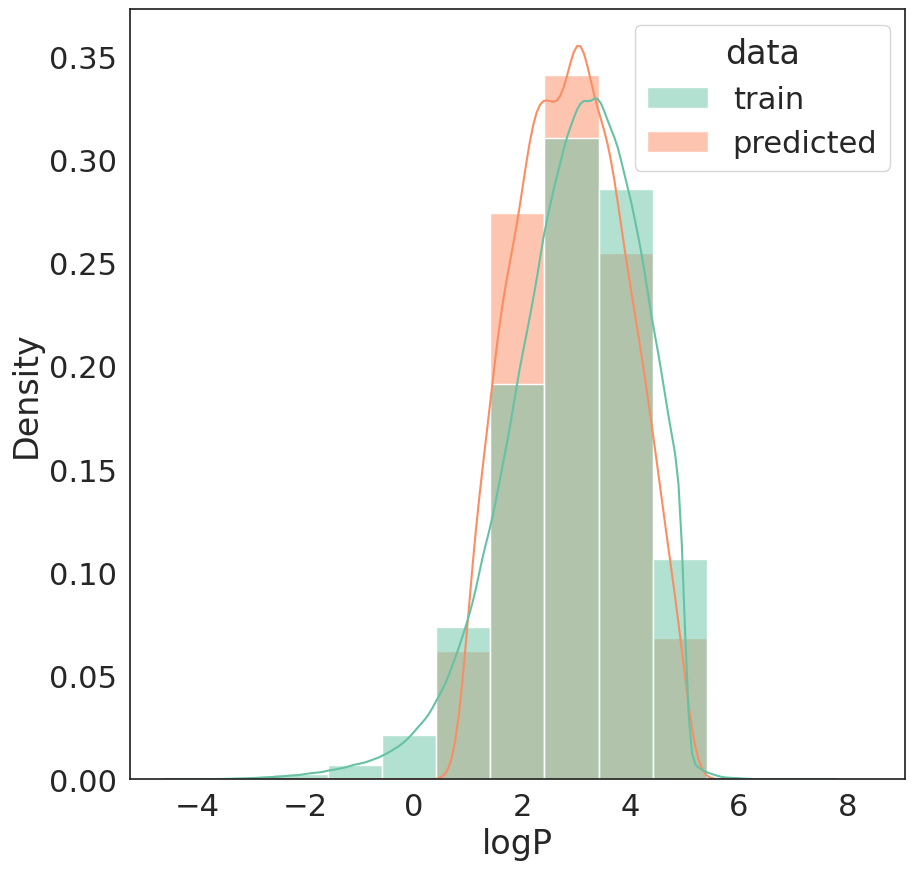

In [50]:
#df['logP'] = df['mol'].apply(Chem.Crippen.MolLogP)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(df, x='logP', binwidth=1, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 1}, hue='data', common_norm=False)
fig.set(xlabel='logP')
plt.savefig(f"plots/train_vs_{fp_type}_logP.svg", format='svg')

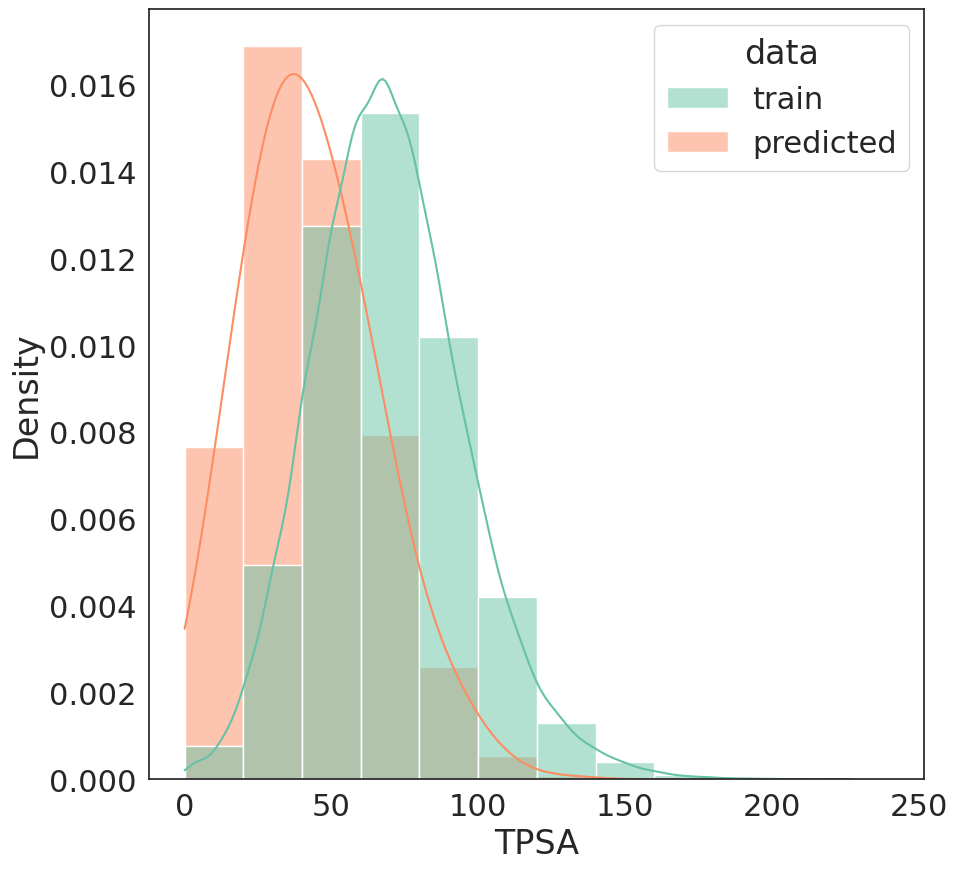

In [51]:
#df['tpsa'] = df['mol'].apply(Chem.rdMolDescriptors.CalcTPSA)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(df, x='tpsa', binwidth=20, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 2}, hue='data', common_norm=False)
fig.set(xlabel='TPSA')
plt.savefig(f"plots/train_vs_{fp_type}_TPSA.svg", format='svg')

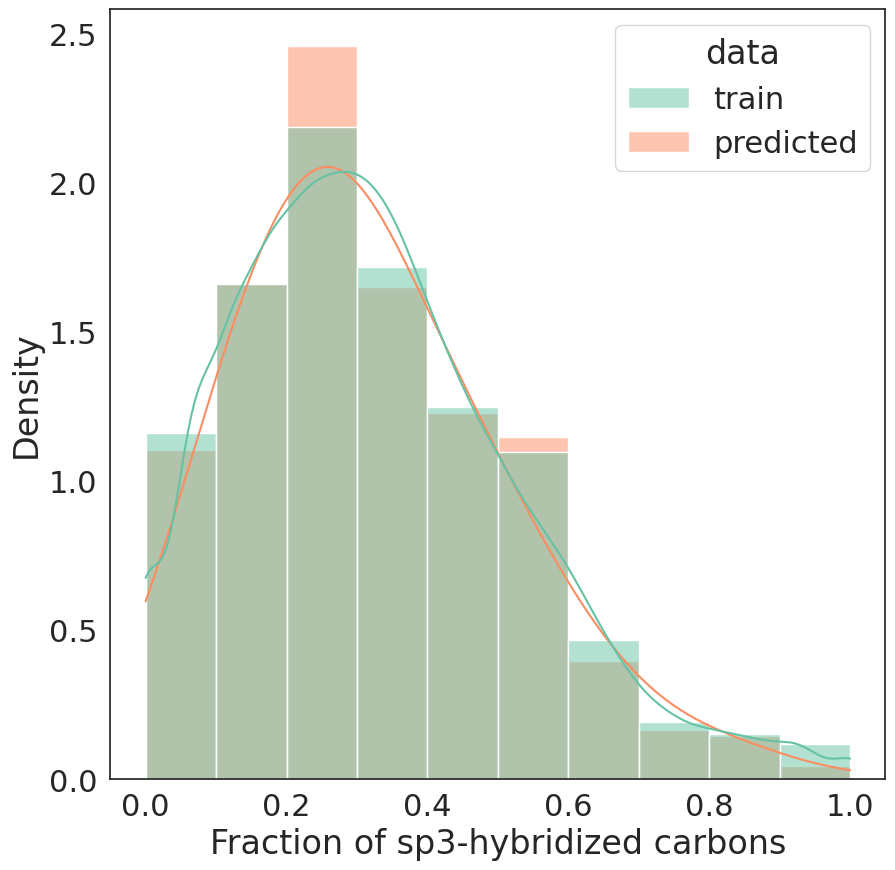

In [52]:
#df['fraction_sp3'] = df['mol'].apply(CalcFractionCSP3)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(df, x='fraction_sp3', binwidth=0.1, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 2}, hue='data', common_norm=False)
fig.set(xlabel='Fraction of sp3-hybridized carbons')
plt.savefig(f"plots/train_vs_{fp_type}_sp3.svg", format='svg')

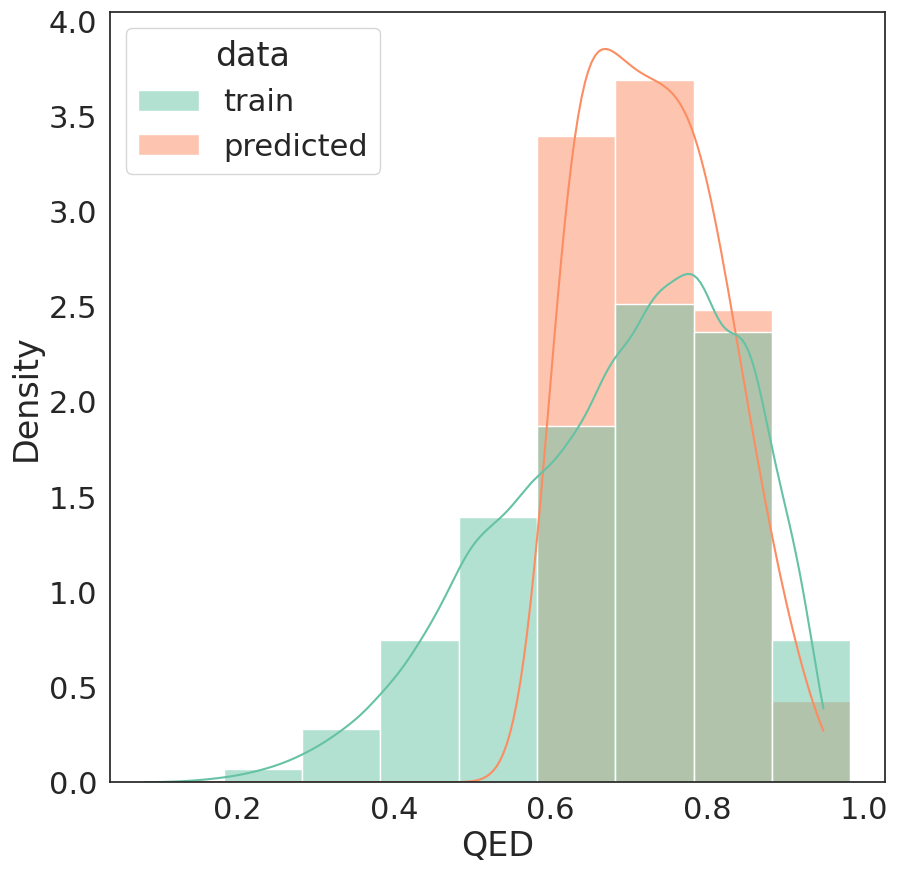

In [56]:
#df['qed'] = df['mol'].apply(QED.qed)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(df, x='qed', binwidth=0.1, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 2.0}, hue='data', common_norm=False)
fig.set(xlabel='QED')
plt.savefig(f"plots/train_vs_{fp_type}_QED.svg", format='svg')

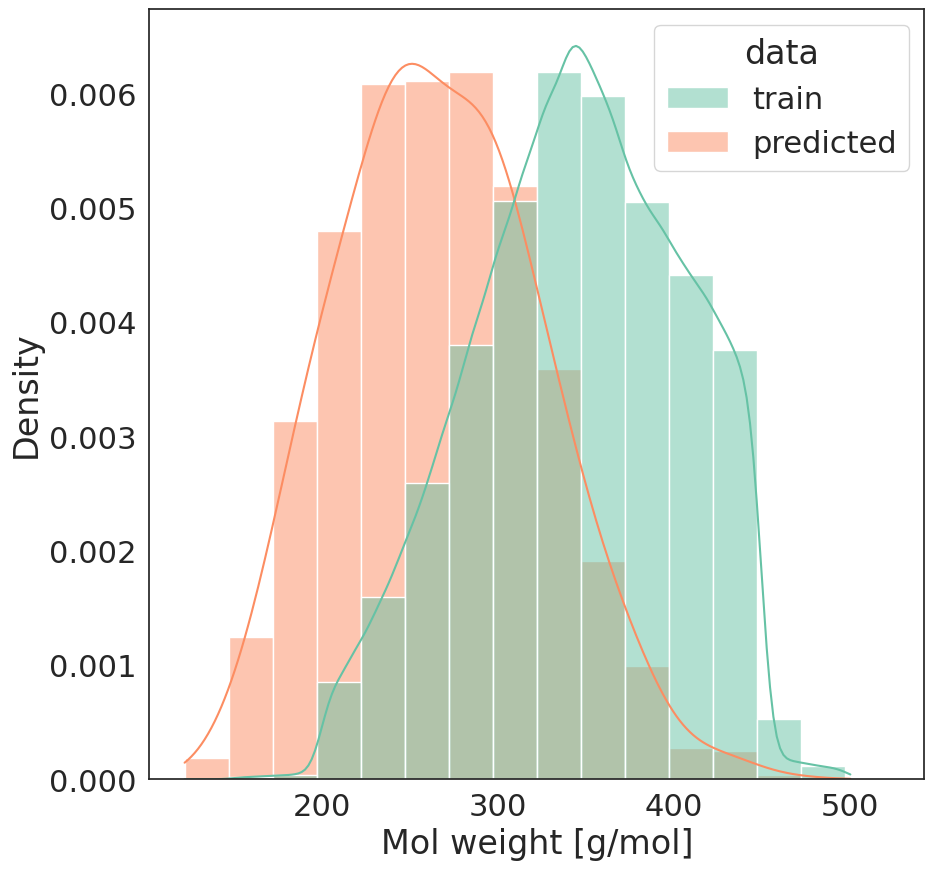

In [54]:
#df['mol_wt'] = df['mol'].apply(Chem.rdMolDescriptors.CalcExactMolWt)
sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(df, x='mol_wt', binwidth=25, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 1.5}, hue='data', common_norm=False)
fig.set(xlabel='Mol weight [g/mol]')
plt.savefig(f"plots/train_vs_{fp_type}_mol_wt.svg", format='svg')